In [1]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import pandas as pd

file_path = 'GUIDE_Test.csv'
df = pd.read_csv(file_path, nrows=12000)
df.head() 
 

,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,IncidentGrade,...,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City,Usage
0,1245540519230,657,11767,87199,2024-06-04T22:56:27.000Z,524,563,LateralMovement,T1021;T1047;T1105;T1569.002,BenignPositive,...,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630,Private
1,1400159342154,3,91158,632273,2024-06-03T12:58:26.000Z,2,2,CommandAndControl,NaN,BenignPositive,...,NaN,0,0,NaN,Suspicious,Suspicious,242,1445,10630,Public
2,1279900255923,145,32247,131719,2024-06-08T03:20:49.000Z,2932,10807,LateralMovement,T1021;T1027.002;T1027.005;T1105,BenignPositive,...,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630,Public
3,60129547292,222,15294,917686,2024-06-12T12:07:31.000Z,0,0,InitialAccess,T1078;T1078.004,FalsePositive,...,NaN,5,66,NaN,NaN,NaN,242,1445,10630,Public
4,515396080539,363,7615,5944,2024-06-06T17:42:05.000Z,27,18,Discovery,T1087;T1087.002,BenignPositive,...,Suspicious,5,66,NaN,NaN,NaN,242,1445,10630,Public


In [3]:
df.columns

Index(['Id', 'OrgId', 'IncidentId', 'AlertId', 'Timestamp', 'DetectorId',
       'AlertTitle', 'Category', 'MitreTechniques', 'IncidentGrade',
       'ActionGrouped', 'ActionGranular', 'EntityType', 'EvidenceRole',
       'DeviceId', 'Sha256', 'IpAddress', 'Url', 'AccountSid', 'AccountUpn',
       'AccountObjectId', 'AccountName', 'DeviceName', 'NetworkMessageId',
       'EmailClusterId', 'RegistryKey', 'RegistryValueName',
       'RegistryValueData', 'ApplicationId', 'ApplicationName',
       'OAuthApplicationId', 'ThreatFamily', 'FileName', 'FolderPath',
       'ResourceIdName', 'ResourceType', 'Roles', 'OSFamily', 'OSVersion',
       'AntispamDirection', 'SuspicionLevel', 'LastVerdict', 'CountryCode',
       'State', 'City', 'Usage'],
      dtype='object')

In [4]:
df = df.drop(columns=['Id','Usage'])

In [5]:
nullvalues = df.isna().sum()
nullvalues.sort_values(ascending=False)

ActionGrouped         11996
ActionGranular        11996
ResourceType          11990
ThreatFamily          11914
EmailClusterId        11886
AntispamDirection     11751
Roles                 11687
SuspicionLevel        10122
LastVerdict            9108
MitreTechniques        6648
Timestamp                 0
OrgId                     0
EntityType                0
IncidentGrade             0
AlertTitle                0
Category                  0
DetectorId                0
IncidentId                0
AlertId                   0
EvidenceRole              0
AccountObjectId           0
AccountName               0
Sha256                    0
DeviceId                  0
Url                       0
AccountSid                0
AccountUpn                0
IpAddress                 0
ApplicationId             0
RegistryValueData         0
RegistryValueName         0
RegistryKey               0
NetworkMessageId          0
DeviceName                0
FileName                  0
ApplicationName     

In [6]:
import pandas as pd

# List of columns to drop based on their null values
columns_to_drop = [
    'ResourceType', 
    'ActionGrouped', 
    'ActionGranular', 
    'ThreatFamily', 
    'EmailClusterId', 
    'AntispamDirection', 
    'Roles', 
    'SuspicionLevel', 
    'LastVerdict', 
    'MitreTechniques'
]

# Drop the specified columns
df = df.drop(columns=columns_to_drop)

# Check the remaining columns
print("Remaining columns after dropping:")
print(df.columns)


Remaining columns after dropping:
Index(['OrgId', 'IncidentId', 'AlertId', 'Timestamp', 'DetectorId',
       'AlertTitle', 'Category', 'IncidentGrade', 'EntityType', 'EvidenceRole',
       'DeviceId', 'Sha256', 'IpAddress', 'Url', 'AccountSid', 'AccountUpn',
       'AccountObjectId', 'AccountName', 'DeviceName', 'NetworkMessageId',
       'RegistryKey', 'RegistryValueName', 'RegistryValueData',
       'ApplicationId', 'ApplicationName', 'OAuthApplicationId', 'FileName',
       'FolderPath', 'ResourceIdName', 'OSFamily', 'OSVersion', 'CountryCode',
       'State', 'City'],
      dtype='object')


In [7]:
df = df.dropna()

In [8]:
import pandas as pd

# Create a DataFrame
df['Timestamp'] = pd.DataFrame(df['Timestamp'])

# Convert the 'Timestamp' column to datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Separate year, month, and day into new columns
df['Year'] = df['Timestamp'].dt.year
df['Month'] = df['Timestamp'].dt.month
df['Day'] = df['Timestamp'].dt.day

# Display the DataFrame
df = df.drop(columns=['Timestamp'])

In [9]:
df

,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,DeviceId,...,FolderPath,ResourceIdName,OSFamily,OSVersion,CountryCode,State,City,Year,Month,Day
0,657,11767,87199,524,563,LateralMovement,BenignPositive,User,Impacted,98799,...,117668,3586,5,66,242,1445,10630,2024,6,4
1,3,91158,632273,2,2,CommandAndControl,BenignPositive,Machine,Impacted,1239,...,117668,3586,0,0,242,1445,10630,2024,6,3
2,145,32247,131719,2932,10807,LateralMovement,BenignPositive,Process,Related,98799,...,22,3586,5,66,242,1445,10630,2024,6,8
3,222,15294,917686,0,0,InitialAccess,FalsePositive,CloudLogonSession,Related,98799,...,117668,3586,5,66,242,1445,10630,2024,6,12
4,363,7615,5944,27,18,Discovery,BenignPositive,User,Impacted,98799,...,117668,3586,5,66,242,1445,10630,2024,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,367,413,1232222,7,6,InitialAccess,TruePositive,Ip,Related,98799,...,117668,3586,5,66,0,18,56,2024,6,4
11996,0,272,511625,0,0,InitialAccess,TruePositive,User,Impacted,98799,...,117668,3586,5,66,242,1445,10630,2024,6,3
11997,591,227000,859809,0,0,InitialAccess,FalsePositive,User,Impacted,98799,...,117668,3586,5,66,242,1445,10630,2024,6,10
11998,85,1156,56590,69,6569,Exfiltration,BenignPositive,User,Impacted,98799,...,117668,3586,5,66,242,1445,10630,2024,6,4


In [10]:
import pandas as pd
import numpy as np
from sklearn.utils import resample

# Assuming your dataframe is called 'df' and the column is 'incidentgrade'

# Get the value counts
value_counts = df['IncidentGrade'].value_counts()

# Find the minimum count
min_count = value_counts.min()

# Create a list to store the balanced dataframes
balanced_dfs = []

# Undersample each class
for class_value in value_counts.index:
    class_df = df[df['IncidentGrade'] == class_value]
    if len(class_df) > min_count:
        # Undersample
        undersampled_df = resample(class_df,
                                   replace=False,    # sample without replacement
                                   n_samples=min_count,
                                   random_state=42)  # reproducible results
        balanced_dfs.append(undersampled_df)
    else:
        # If this class is already at or below the minimum, keep all samples
        balanced_dfs.append(class_df)

# Combine the balanced dataframes
df_balanced = pd.concat(balanced_dfs)

# Verify the new class distribution
print(df_balanced['IncidentGrade'].value_counts())
df = df_balanced

IncidentGrade
BenignPositive    2594
TruePositive      2594
FalsePositive     2594
Name: count, dtype: int64


In [11]:
df.shape

(7782, 36)

In [12]:
df = df.astype('category')

In [13]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = df.columns
# Convert all categorical columns to strings to ensure uniform type
for col in categorical_columns:
    df[col] = df[col].astype(str)

# Now apply LabelEncoder
label_encoder = LabelEncoder()
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

df.head()  # Check if categorical columns have been encoded


,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,DeviceId,...,FolderPath,ResourceIdName,OSFamily,OSVersion,CountryCode,State,City,Year,Month,Day
4676,544,2673,5436,299,969,16,0,7,1,253,...,35,2,3,5,18,29,6,0,3,28
10888,729,2595,5750,1,1,10,0,10,1,253,...,35,2,3,5,18,29,6,0,3,6
7072,331,1315,6652,299,969,16,0,7,1,253,...,35,2,3,5,18,29,6,0,3,21
9022,466,4323,5580,176,471,1,0,18,1,253,...,35,2,3,5,18,29,6,0,3,2
10361,152,2478,2536,2,1486,10,0,5,1,253,...,35,2,3,5,18,29,6,0,3,26


In [14]:
df.nunique()

OrgId                 1016
IncidentId            5089
AlertId               7218
DetectorId             645
AlertTitle            1622
Category                18
IncidentGrade            3
EntityType              20
EvidenceRole             2
DeviceId               256
Sha256                 407
IpAddress             1502
Url                    440
AccountSid            1671
AccountUpn            2551
AccountObjectId       1636
AccountName           1730
DeviceName             664
NetworkMessageId       915
RegistryKey              9
RegistryValueName        7
RegistryValueData        5
ApplicationId           14
ApplicationName         19
OAuthApplicationId       4
FileName               568
FolderPath             352
ResourceIdName           3
OSFamily                 4
OSVersion                6
CountryCode             59
State                  146
City                   207
Year                     1
Month                    4
Day                     30
dtype: int64

In [15]:
# Update with the actual column name for your target variable
target_column = 'IncidentGrade'  # Example: Replace 'class' with the actual name of the target column

# Split features and target variable
X = df.drop(target_column, axis=1)
y = df[target_column]

# Train-Validation split (80-20 split)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set shape: {X_train.shape}")
print(f"Validation set shape: {X_val.shape}")


Training set shape: (6225, 35)
Validation set shape: (1557, 35)


In [16]:
# Train a Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on validation set
y_pred = rf_model.predict(X_val)

# Evaluate model performance
print(classification_report(y_val, y_pred))

# Check macro F1, precision, and recall
macro_f1 = f1_score(y_val, y_pred, average='macro')
precision = precision_score(y_val, y_pred, average='macro')
recall = recall_score(y_val, y_pred, average='macro')

print(f"Macro F1 Score: {macro_f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")


              precision    recall  f1-score   support

           0       0.70      0.88      0.78       519
           1       0.84      0.76      0.79       519
           2       0.88      0.74      0.80       519

    accuracy                           0.79      1557
   macro avg       0.81      0.79      0.79      1557
weighted avg       0.81      0.79      0.79      1557

Macro F1 Score: 0.7932600652464304
Precision: 0.8055890280466551
Recall: 0.7925497752087347


In [17]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)

# Fit the model to the training data
gb_model.fit(X_train, y_train)

# Make predictions on validation set
y_pred = gb_model.predict(X_val)

# Evaluate model performance
print(classification_report(y_val, y_pred))

# Check macro F1, precision, and recall
macro_f1 = f1_score(y_val, y_pred, average='macro')
precision = precision_score(y_val, y_pred, average='macro')
recall = recall_score(y_val, y_pred, average='macro')

print(f"Macro F1 Score: {macro_f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")



              precision    recall  f1-score   support

           0       0.65      0.83      0.73       519
           1       0.77      0.69      0.73       519
           2       0.87      0.71      0.78       519

    accuracy                           0.75      1557
   macro avg       0.76      0.75      0.75      1557
weighted avg       0.76      0.75      0.75      1557

Macro F1 Score: 0.7467519596856533
Precision: 0.7635880621562653
Recall: 0.7450224791265253


In [18]:
from xgboost import XGBClassifier

# Initialize the XGBoost model
xgb_model = XGBClassifier(random_state=42)

# Fit the model to the training data
xgb_model.fit(X_train, y_train)

# Make predictions on validation set
y_pred = xgb_model.predict(X_val)

# Evaluate model performance
print(classification_report(y_val, y_pred))

# Check macro F1, precision, and recall
macro_f1 = f1_score(y_val, y_pred, average='macro')
precision = precision_score(y_val, y_pred, average='macro')
recall = recall_score(y_val, y_pred, average='macro')

print(f"Macro F1 Score: {macro_f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")




              precision    recall  f1-score   support

           0       0.77      0.83      0.80       519
           1       0.82      0.81      0.81       519
           2       0.88      0.81      0.84       519

    accuracy                           0.82      1557
   macro avg       0.82      0.82      0.82      1557
weighted avg       0.82      0.82      0.82      1557

Macro F1 Score: 0.8200217282503875
Precision: 0.8220695620229318
Recall: 0.8195247270391778


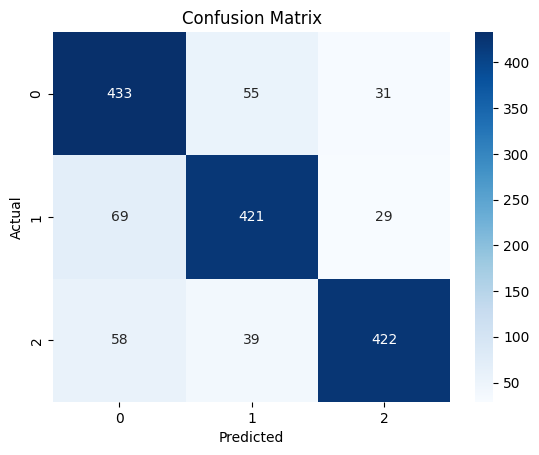

In [19]:
# Confusion matrix to visualize misclassifications
conf_matrix = confusion_matrix(y_val, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, scoring='f1_macro', cv=5)
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_
print(best_model)

# Make predictbesions on validation set
y_pred = best_model.predict(X_val)

# Evaluate model performance
print(classification_report(y_val, y_pred))

# Check macro F1, precision, and recall
macro_f1 = f1_score(y_val, y_pred, average='macro')
precision = precision_score(y_val, y_pred, average='macro')
recall = recall_score(y_val, y_pred, average='macro')

print(f"Macro F1 Score: {macro_f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")



RandomForestClassifier(max_depth=15, n_estimators=150, random_state=42)
              precision    recall  f1-score   support

           0       0.64      0.91      0.75       519
           1       0.85      0.68      0.76       519
           2       0.90      0.69      0.78       519

    accuracy                           0.76      1557
   macro avg       0.80      0.76      0.76      1557
weighted avg       0.80      0.76      0.76      1557

Macro F1 Score: 0.764526130949082
Precision: 0.7978517667608186
Recall: 0.7630057803468208
